> «Быстрый алгоритм» — это алгоритм, для которого с увеличением размера входных данных наихудшее время исполнения растет медленно. Игнорирование постоянных коэффициентов и членов низших порядков!

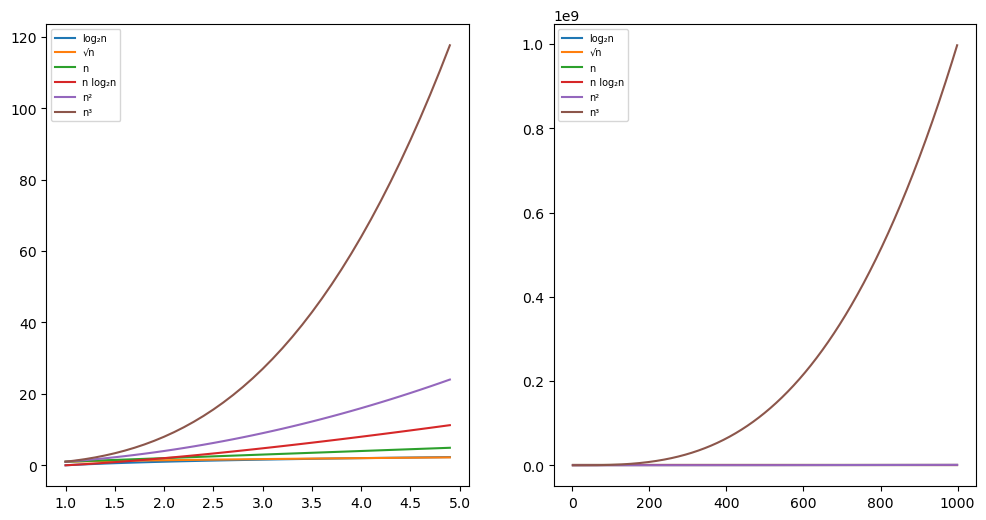

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6) # (w, h)

import numpy as np
figure, axis = plt.subplots(1, 2)

def N_log2N(seq):
    return [v * np.log2(v) for v in seq]


# for small data
x_s = np.arange(1, 5, 0.1)
axis[0].plot(x_s, np.log2(x_s), label='log₂n')
axis[0].plot(x_s, np.sqrt(x_s), label='√n')
axis[0].plot(x_s, x_s, label='n')
axis[0].plot(x_s, np.array(N_log2N(x_s)), label='n log₂n')
axis[0].plot(x_s, np.power(x_s, 2), label='n²')
axis[0].plot(x_s, np.power(x_s, 3), label='n³')

# for big data
x_b = np.arange(1, 1000, 1)
axis[1].plot(x_b, np.log2(x_b), label='log₂n')
axis[1].plot(x_b, np.sqrt(x_b), label='√n')
axis[1].plot(x_b, x_b, label='n')
axis[1].plot(x_b, np.array(N_log2N(x_b)), label='n log₂n')
axis[1].plot(x_b, np.power(x_b, 2), label='n²')
axis[1].plot(x_b, np.power(x_b, 3), label='n³')

axis[0].legend(fontsize=7)
axis[1].legend(fontsize=7)
plt.show()

In [19]:
import time

def dec_time(func):
    def wrap(*args):
        start = time.monotonic()
        res = func(*args)
        proc = time.monotonic() - start
        print(f'{func.__name__}: {round(proc, 5)} sec')
        return res
    return wrap

## Поиск

In [ ]:
# Линейный поиск 
# O(n)
def base_search(arr, el):
    la = len(arr)
    for i in range(la):
        if arr[i] == el:
            return i
    return None

In [ ]:
# Бинарный поиск
# O(log n)
def bin_search(arr, el):
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2

        if arr[mid] == el:
            return mid
        if arr[mid] < el:
            low = mid + 1
        if arr[mid] > el:
            high = mid - 1
    return None

In [ ]:
# Рекурсивный бинарный поиск
# O(log n)
def rec_bin_search(arr, el, low, high):
    if low > high:
        return None

    mid = (low + high) // 2
    if arr[mid] == el:
        return mid
    
    if arr[mid] < el:
        return rec_bin_search(arr, el, mid + 1, high)

    if arr[mid] > el:
        return rec_bin_search(arr, el, low, mid - 1)

## Сортировка

In [ ]:
# Сортировка выбором
# O(n^2)
def selection_sort(a):
    la = len(a)
    for i in range(la):
        for j in range(i+1, la):
            if a[j] < a[i]:
                a[i], a[j] = a[j], a[i]
    return a

In [ ]:
# Сортировка вставкой
# O(n^2)
def insertion_sort(a):
    la = len(a)
    for i in range(1, la):
        key = a[i]
        j = i-1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j-=1
        a[j+1] = key
    return a

In [ ]:
# Сортировка слиянием
# O(n log n)
# Cортировка слиянием не работает без применения дополнительной памяти: она делает полные копии всего входного массива.
# Если вопрос использования памяти приоритетен, использовать сортировку слиянием нельзя.
def merge_sort(seq):
    len_seq = len(seq)
    if len_seq > 1:
        mid = len_seq // 2
        
        a = seq[:mid]
        b = seq[mid:]
        
        merge_sort(a)
        merge_sort(b)

        i = j = k = 0

        while i < len(a) and j < len(b):
            if a[i] < b[j]:
                seq[k] = a[i]
                i += 1
            else:
                seq[k] = b[j]
                j += 1
            k += 1

        while i < len(a):
            seq[k] = a[i]
            i += 1
            k += 1

        while j < len(b):
            seq[k] = b[j]
            j += 1
            k += 1

    return seq

In [17]:
# Пузырьковая сортировка
# O(n^2)
def sort_bubble(seq):
    len_seq = len(seq)
    for n in range(len_seq):
        for i in range(len_seq-1):
            if seq[i+1] < seq[i]:
                seq[i], seq[i+1] = seq[i+1], seq[i]
    return seq

In [ ]:
# Быстрая сортировка
# O(n^2)
def partition(a, lo, hi):
    pivot = a[hi]
    i = lo - 1
    for j in range(lo, hi):
        if a[j] <= pivot:
            i = i + 1
            a[i], a[j] = a[j], a[i]
    a[i + 1], a[hi] = a[hi], a[i + 1]
    return i + 1

def quick_sort(a, lo, hi):
    if lo < hi:
        p = partition(a, lo, hi)
        quick_sort(a, lo, p - 1)
        quick_sort(a, p + 1, hi)
    return a

In [ ]:
# Сортировка подсчетом
# Эффективный алгоритм, но применим он, только если константа 'С' достаточно мала.
# O(n+k)
def count_sort(a):
    la = len(a)
    max_el = max(a)
    min_el = min(a)
    count_list = [0] * ((max_el - min_el) + 1)
    
    for i in range(la):
        count_list[a[i] + (-1 * min_el)] += 1

    count_list[0] -= 1
    for i in range(1, (max_el - min_el) + 1):
        count_list[i] += count_list[i - 1]
    
    result_list = [None] * la
 
    for j in a[::-1]:
        result_list[count_list[j + (-1 * min_el)]] = j
        count_list[j + (-1 * min_el)] -= 1
 
    return result_list

In [ ]:
# Сортировка подсчетом (для положительных чисел и 0)
# O(n+k)
def count_sort_positive(a):
    la = len(a)
    max_el = max(a)
    min_el = min(a)
    
    dp = (max_el - min_el) + 1

    # equal
    # O(n)
    eq = [0] * dp
    for i in range(la):
        eq[a[i]] += 1

    # less
    # O(k)
    # значение less[j] равно количеству ключей сортировки, меньших j
    less = [0] * dp
    less[0] = 0
    for j in range(1, dp):
        less[j] = less[j-1] + eq[j-1]

    # sorting
    # O(n+k)
    result = [0] * la
    nxt = [0] * dp
    for k in range(dp):
        nxt[k] = less[k] + 1
    
    for l in range(0, la):
        key = a[l]
        index = nxt[key]
        result[index-1] = a[l]
        nxt[key] += 1

    return result

## Битовые маски

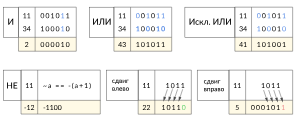

In [15]:
# Операции
x = 22
y = 26

# and
print('And:')
print(f'{bin(x)} ({x})')
print(f'{bin(y)} ({y})')
print(f'{bin(x & y)} ({x & y})\n')

# or
print('Or:')
print(f'{bin(x)} ({x})')
print(f'{bin(y)} ({y})')
print(f'{bin(x | y)} ({x | y})\n')

# xor
print('Xor:')
print(f'{bin(x)} ({x})')
print(f'{bin(y)} ({y})')
print(f'{bin(x ^ y)} ({x ^ y})\n')

# not
print('Not:')
print(f'{bin(x)} ({x})')
print(f'{bin(~x)} ({~x})\n')

# >> сдвиг вправо
print('>>:')
print(f'{bin(x)} ({x})')
print(f'{bin(x >> 1)} ({x >> 1})\n')

# << сдвиг влево
print('<<:')
print(f'{bin(x)} ({x})')
print(f'{bin(x << 1)} ({x << 1})\n')

# Операция x << k соответствует умножению x на 2**k,
# а x >> k – делению x на 2**k с последующим округлением с недостатком до целого.

And:
0b10110 (22)
0b11010 (26)
0b10010 (18)

Or:
0b10110 (22)
0b11010 (26)
0b11110 (30)

Xor:
0b10110 (22)
0b11010 (26)
0b1100 (12)

Not:
0b10110 (22)
-0b10111 (-23)

>>:
0b10110 (22)
0b1011 (11)

<<:
0b10110 (22)
0b101100 (44)



> Битовой маской называется число вида 1 << k, содержащее в позиции k единицу, а во всех остальных позициях – нули.

> выражение __x | (1 << k)__ устанавливает k-й бит x в единицу,  
  выражение __x & ~(1 << k)__ сбрасывает k-й бит x в нуль,  
  выражение __x ˆ (1 << k)__ инвертирует k-й бит x,  
  выражение __x & (x − 1)__ сбрасывает последний единичный бит x в нуль,  
  выражение __x & −x__ сбрасывает в нуль все единичные биты, кроме последнего  
  выражение __x | (x − 1)__ инвертирует все биты после последнего единичного.

> Положительное число x является степенью двойки тогда и только тогда, когда x & (x − 1) = 0.

## Множества

In [4]:
# Нахождение подмножеств - рекурсия
a = [0, 2, 4, 6, 8]
aln = len(a)
subset = []
subsets = []
def search(k=0):
    if k == aln:
        subsets.append(subset[:])
    else:
        subset.append(a[k])
        search(k+1)
        subset.pop(-1)
        search(k+1)

search()
print(subsets)

[[0, 2, 4, 6, 8], [0, 2, 4, 6], [0, 2, 4, 8], [0, 2, 4], [0, 2, 6, 8], [0, 2, 6], [0, 2, 8], [0, 2], [0, 4, 6, 8], [0, 4, 6], [0, 4, 8], [0, 4], [0, 6, 8], [0, 6], [0, 8], [0], [2, 4, 6, 8], [2, 4, 6], [2, 4, 8], [2, 4], [2, 6, 8], [2, 6], [2, 8], [2], [4, 6, 8], [4, 6], [4, 8], [4], [6, 8], [6], [8], []]


In [1]:
# Нахождение подмножеств (битовые операции)
a = [0, 2, 4, 7, 8]
x = 0
for i in range(len(a)):
    x |= (1 << a[i])
print(f'{bin(x)}\n')

b = 0
flag = True
while flag:
    tmp = []
    b = (b-x) & x
    
    for i in range(32):
        if (b & (1 << i)):
            tmp.append(i) 
    print(tmp)
    
    if b == 0:
        flag = False

0b110010101

[0]
[2]
[0, 2]
[4]
[0, 4]
[2, 4]
[0, 2, 4]
[7]
[0, 7]
[2, 7]
[0, 2, 7]
[4, 7]
[0, 4, 7]
[2, 4, 7]
[0, 2, 4, 7]
[8]
[0, 8]
[2, 8]
[0, 2, 8]
[4, 8]
[0, 4, 8]
[2, 4, 8]
[0, 2, 4, 8]
[7, 8]
[0, 7, 8]
[2, 7, 8]
[0, 2, 7, 8]
[4, 7, 8]
[0, 4, 7, 8]
[2, 4, 7, 8]
[0, 2, 4, 7, 8]
[]


In [5]:
# Перестановка без повторений - рекурсия
# Число перестановок (C = n!)
a = [1, 2, 3, 4]
aln = len(a)
perm = []
perms = []
flags = [False]*aln
def search():
    if len(perm) == aln:
        perms.append(perm[:])
    else:
        for i in range(aln):
            if flags[i]: continue
            flags[i] = True
            perm.append(a[i])
            search()
            flags[i] = False
            perm.pop(-1)

search()
print(perms)

[[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2], [1, 4, 2, 3], [1, 4, 3, 2], [2, 1, 3, 4], [2, 1, 4, 3], [2, 3, 1, 4], [2, 3, 4, 1], [2, 4, 1, 3], [2, 4, 3, 1], [3, 1, 2, 4], [3, 1, 4, 2], [3, 2, 1, 4], [3, 2, 4, 1], [3, 4, 1, 2], [3, 4, 2, 1], [4, 1, 2, 3], [4, 1, 3, 2], [4, 2, 1, 3], [4, 2, 3, 1], [4, 3, 1, 2], [4, 3, 2, 1]]


In [18]:
# Подсчет минимального количества монет для размена суммы
def cnt(coins, summa, coins_count, coins_used):
    for x in range(summa+1):
        tmp = x
        new_coin = 1
        for c in [c for c in coins if c <= x]:
            if coins_count[x-c]+1 < tmp:
                tmp = coins_count[x-c]+1
                new_coin = c
        coins_count[x] = tmp
        coins_used[x] = new_coin

    i = summa
    res = []
    while i > 0:
        res.append(coins_used[i])
        i -= coins_used[i]

    return coins_count[summa], res   # вывод - мнимальное количество, список из номиналов монет


coins = [1, 5, 10, 21, 25]   # номиналы монет
summa = 63                   # сумма

coins_used = [0] * (summa + 1)
coins_count = [0] * (summa + 1)

print(cnt(coins, summa, coins_count, coins_used))

(3, [21, 21, 21])


In [18]:
# циклическая очередь (дни недели)
rd = (1, 2, 3, 4, 5, 6, 7)
n = 3
c = 3
print(rd[(c - 1 + n) % 7])
print(rd[(c - 1 - n) % 7])
c = 7
print(rd[(c - 1 + n) % 7])
c = 1
print(rd[(c - 1 - n) % 7])

6
7
3
5


In [13]:
# циклическая очередь
a = 'abcdefghijklmnopqrstuvwxyz'
len_seq = len(a)
base = 'g'
n = 3
print(a[(a.index(base) + n) % len_seq])
print(a[(a.index(base) - n) % len_seq])
base_a = 'a'
print(a[(a.index(base_a) - n) % len_seq])
base_z = 'z'
print(a[(a.index(base_z) + n) % len_seq])

j
d
x
c


In [109]:
# количество единиц в бинарном представлении числа
n = 514   # число
res = 0
while n:
    n &= n-1
    res+=1
print(res)

2


In [110]:
# подсчет инверсий в массиве (в основе сортировка слиянием)
def count_inv(seq):
    len_seq = len(seq)
    
    if len_seq <= 1:
        return 0
    
    mid = len_seq // 2
    inv_count = 0

    a = seq[:mid]
    b = seq[mid:]
    
    inv_count += count_inv(a)
    inv_count += count_inv(b)

    i = j = k = 0

    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            seq[k] = a[i]
            i += 1
        else:
            seq[k] = b[j]
            j += 1
            inv_count += len(a) - i

        k += 1

    while i < len(a):
        seq[k] = a[i]
        i += 1
        k += 1

    while j < len(b):
        seq[k] = b[j]
        j += 1
        k += 1

    return inv_count


a = [6, 5, 4, 1, 2, 3]
print(count_inv(a))

12


In [137]:
# минимальное значение xor между двумя элементами в массиве
def main(seq):
    L = len(bin(max(seq))) - 1
    trie_dct = {}

    def insert(el):
        cur = trie_dct
        for bit in format(el, f'0{L}b'):
            if bit not in cur:
                cur[bit] = {}
            cur = cur[bit]
        cur['val'] = el


    def best_match(el):
        cur = trie_dct
        for bit in format(el, f'0{L}b'):
            rev = '0' if bit == '1' else '1'
            if bit in cur:
                cur = cur[bit]
            else:
                cur = cur[rev]
        return cur['val']


    insert(seq[0])
    min_xor = seq[0] ^ seq[1]

    for el in seq[1:]:
        min_xor = min(min_xor, el ^ best_match(el))
        insert(el)

    return min_xor

a = (2, 4, 6, 8)
print(main(a))

2


In [ ]:
# подсчет максимумов в скользящем окне (k - размер окна)
# O(n)
from collections import deque

def findMax(seq, k):
    res = []
    ls = len(seq)
    
    if ls * k == 0:
        return res
    
    # dq содержит индексы элементов
    dq = deque()

    # 0 .. 2
    for i in range(k):
        while dq and seq[k-1] >= seq[dq[-1]]:
            dq.pop()
        dq.append(i)
        
    # 3 ... (ls-1)
    for i in range(k, ls):
        res.append(seq[dq[0]])

        while dq and dq[0] <= i-k:
            dq.popleft()

        while dq and seq[i] >= seq[dq[-1]]:
            dq.pop()
        
        dq.append(i)
    
    res.append(seq[dq[0]])
    return res

In [15]:
# максимальная сумма подмассивов
# O(n)
nums = [-1, 2, 4, -3, 5, 2, -5, 2]

def subar_max(a):
    res = 0
    tmp = 0
    for i in range(len(a)):
        tmp = max(a[i], tmp + a[i])
        res = max(res, tmp)
    return res


print(subar_max(nums))

10
